# Аналитический кейс для интернет-магазина. 
## Цель: увеличение выручки.

1. [**Приоритезация гипотез**](#100101)
2. [**Анализ А/В-теста.**](#100102)
    * [21.Проверка данных.](#102100)
    * [22.График кумулятивной выручки по группам.](#102101)
    * [23.График кумулятивного среднего чека по группам.](#102102)
    * [24.График относительного изменения кумулятивного среднего чека группы B к группе A.](#102103)
    * [25.График кумулятивной конверсии по группам.](#102104)
    * [26.График относительного изменения кумулятивной конверсии группы B к группе A.](#102105)
    * [27.Точечный график количества заказов по пользователям.](#102106)  
    * [28.95-й и 99-й перцентили количества заказов на пользователя. Граница для определения аномальных пользователей.](#102107)  
    * [29.Точечный график стоимостей заказов.](#102108)  
    * [30.95-й и 99-й перцентили стоимости заказов. Граница для определения аномальных заказов.](#102109)     
    * [31.Статистическая значимость различий в конверсии между группами по «сырым» данным.](#102110)     
    * [32.Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.](#102111)     
    * [33.Статистическая значимость различий в конверсии между группами по «очищенным» данным.](#102112)     
    * [34.Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.](#102113)     
3. [**Выводы.**](#100103)

## Часть 1. Приоритезация гипотез. <a id='100101'></a>

In [34]:
import pandas as pd
hyp=pd.read_csv('hypothesis.csv')
order=pd.read_csv('orders.csv')
visit=pd.read_csv('visitors.csv')

import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
pd.options.mode.chained_assignment = None
pd.options.display.max_colwidth = 100
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500) 
pd.set_option('display.width', 1000)

In [35]:
hyp

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [36]:
hyp['ICE'] = (hyp['Impact'] * hyp['Confidence']) / hyp['Efforts']
hyp[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


In [37]:
hyp['RICE'] = (hyp['Reach'] * hyp['Impact'] * hyp['Confidence']) / hyp['Efforts']
hyp[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


При использовании ICE - наиболее приоритетными будут 8, 0, 7, 6 гипотезы, а при использовании RICE - приоритезация изменилась, 7 гипотеза вышла на первое место, а за ней следуют 2, 0, 6, значит в случае подтверждения этих гипотез, охват аудитории будет больше.

# Часть 2. Анализ A/B-теста <a id='100102'></a>

**21.Для начала проверим все ли в порядке в таблицах с данными** <a id='102100'></a>

In [38]:
order.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [39]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.8+ KB


In [40]:
order['group'].unique()

array(['B', 'A'], dtype=object)

In [41]:
order.isnull().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

**изменим тип столбца date, на тип datetime**

In [42]:
order['date'] = pd.to_datetime(order['date'], format = '%Y-%m-%d')

In [43]:
visit.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [44]:
visit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.5+ KB


In [45]:
visit['group'].unique()

array(['A', 'B'], dtype=object)

In [46]:
visit.isnull().sum()

date        0
group       0
visitors    0
dtype: int64

**так же изменим тип столбца date, на тип datetime**

In [47]:
visit['date'] = pd.to_datetime(visit['date'], format = '%Y-%m-%d')

In [48]:
#проверим:
#visit['date'].describe()
#order['date'].describe()

**22.Построим график кумулятивной выручки по группам.** <a id='1002101'></a>

In [49]:
datesGroups = order[['date','group']].drop_duplicates()

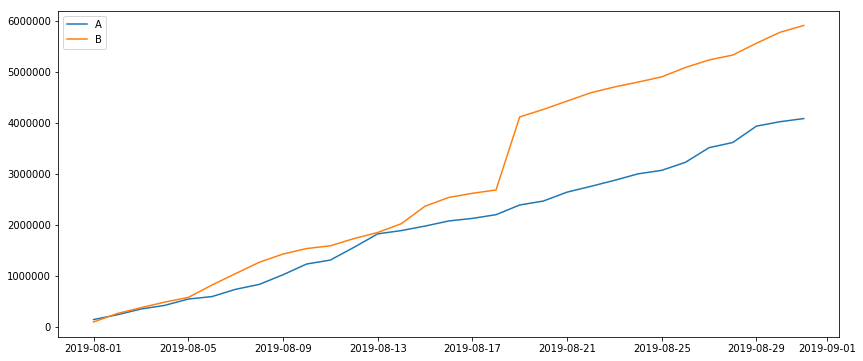

In [50]:
ordersAggregated = datesGroups.apply(lambda x: order[np.logical_and(order['date'] <= x['date'], order['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visit[np.logical_and(visit['date'] <= x['date'], visit['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cummulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cummulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cummulativeRevenueA = cummulativeData[cummulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cummulativeRevenueB = cummulativeData[cummulativeData['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(14, 6))

# Строим график выручки группы А
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue'], label='B')
plt.legend()

после 18-го августа сегмент В вышел вперед и продолжал лидировать, но возможно есть аномальные заказы

**23.Построим график кумулятивного среднего чека по группам.** <a id='102102'></a>

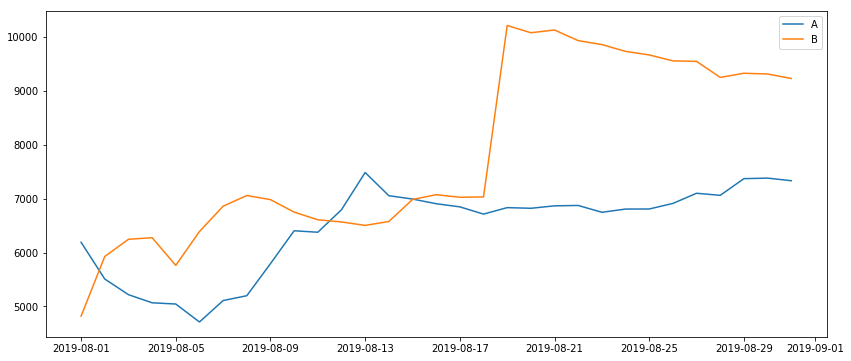

In [51]:
plt.figure(figsize=(14, 6))
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue']/cummulativeRevenueA['orders'], label='A')
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue']/cummulativeRevenueB['orders'], label='B')
plt.legend()

после 18-го августа явно виден очень большой отрыв среднего чека в группе В, нужен анализ выбросов

**24. Построим график относительного изменения кумулятивного среднего чека группы B к группе A.** <a id='102103'></a>

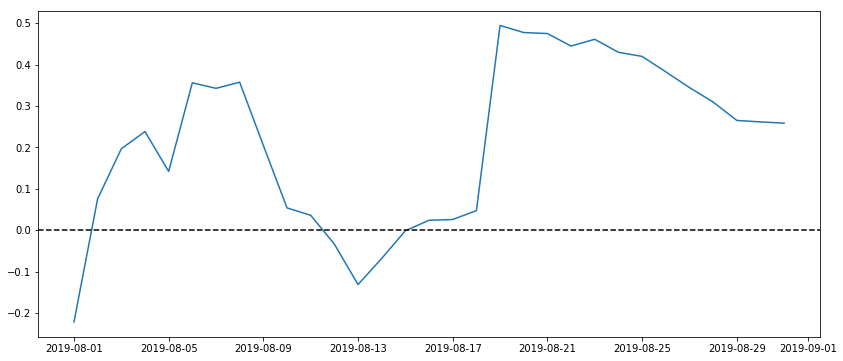

In [52]:
# собираем данные в одном датафрейме
mergedCummulativeRevenue = cummulativeRevenueA.merge(cummulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(14, 6))

# cтроим отношение средних чеков
plt.plot(mergedCummulativeRevenue['date'], (mergedCummulativeRevenue['revenueB']/mergedCummulativeRevenue['ordersB'])/(mergedCummulativeRevenue['revenueA']/mergedCummulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

5, 13, 18 августа резкие скачки среднего чека

**25.Построим график кумулятивной конверсии по группам.** <a id='102104'></a>

['2019-08-01', '2019-08-31', 0, 0.05]

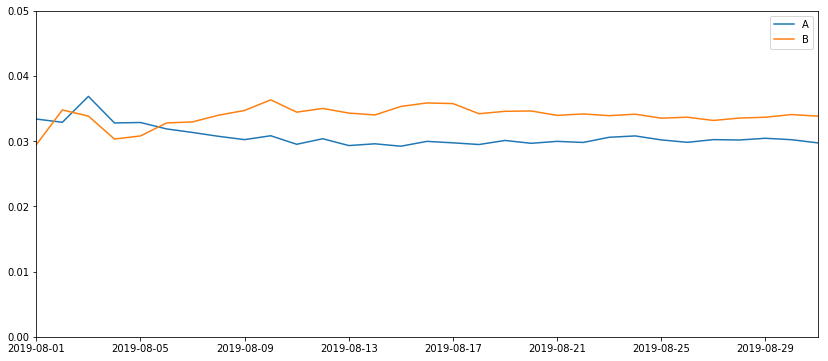

In [53]:
# считаем кумулятивную конверсию
cummulativeData['conversion'] = cummulativeData['orders']/cummulativeData['visitors']

# отделяем данные по группе A
cummulativeDataA = cummulativeData[cummulativeData['group']=='A']

# отделяем данные по группе B
cummulativeDataB = cummulativeData[cummulativeData['group']=='B']
plt.figure(figsize=(14, 6))

# строим графики
plt.plot(cummulativeDataA['date'], cummulativeDataA['conversion'], label='A')
plt.plot(cummulativeDataB['date'], cummulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis(['2019-08-01', '2019-08-31', 0, 0.05])

до 6 августа сегмент А имел большую конверсию, но после график стабилизировался и сегмент В стабильно вышел на первое место

**26.Построим график относительного изменения кумулятивной конверсии группы B к группе A.** <a id='102105'></a>

['2019-08-01', '2019-08-31', -0.5, 0.5]

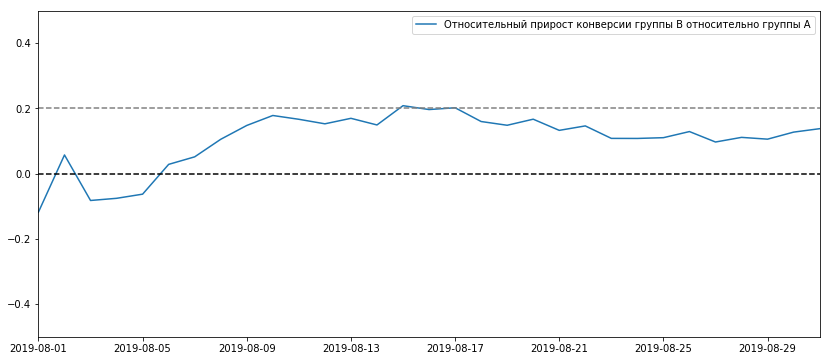

In [54]:
mergedCummulativeConversions = cummulativeDataA[['date','conversion']].merge(cummulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(14, 6))

plt.plot(mergedCummulativeConversions['date'], mergedCummulativeConversions['conversionB']/mergedCummulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.5, 0.5])

с 6 августа группа В лидирует по конверсии, росла до   числа, а затем стабилизировалась по конверсии 

**27.Построим точечный график количества заказов по пользователям.** <a id='102106'></a>

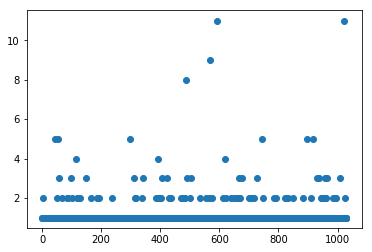

In [55]:
ordersByUsers = order.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsers.columns = ['visitorId','orders']

#print(ordersByUsers.sort_values(by='orders',ascending=False).head(10))

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])

Пользователей заказавших более 2-х раз совсем мало.

**28.Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.** <a id='102107'></a>

In [56]:
np.percentile(ordersByUsers['orders'], [90, 95, 99])

array([1., 2., 4.])

не более 5% пользователей совершали больше 2 заказов, и не более 1% больше 4-х

**29.Построим точечный график стоимостей заказов.** <a id='102108'></a>

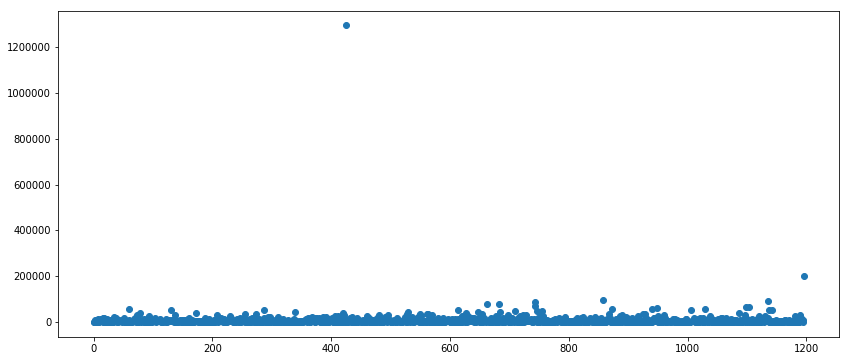

In [57]:
x_values = pd.Series(range(0,len(order['revenue'])))
plt.figure(figsize=(14, 6))
plt.scatter(x_values, order['revenue'])

есть выброс в районе 1200000 (явно аномалия) и в районе 200000

**30.Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.** <a id='102109'></a>

In [58]:
np.percentile(order['revenue'], [90, 95, 99])

array([18168. , 28000. , 58233.2])

не более чем у 5% заказов чек выше чем 28000, и не более чем у 1% заказов более 58233

**31.Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.** <a id='102110'></a>

In [59]:
visitorsADaily = visit[visit['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visit[visit['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = order[order['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = order[order['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

#Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.
ordersByUsersA = order[order['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = order[order['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

#Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули, чтобы подготовить выборки к проверке критерием Манна-Уитни.
#Список с количеством заказов для каждого из пользователей: ordersByUsersA['orders'].
#Нули для пользователей, которые ничего не заказывали. Их количество равно разнице между суммой посетителей и количеством записей о заказах: data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders']). Создадим объект pd.Series нужной длины:
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')

[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')]

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

#Выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1. Округлим до трёх знаков после запятой.
ordersByUsersA = order[order['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = order[order['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print('{0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('{0:.3f}'.format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

0.008
0.138


p-value значительно меньше 0,05 следовательно нулевую гипотезу отвергаем. Анализ "сырых данных" показывает, что в конверсии между группами есть статистически значимые различия. Относительный прирост конверсии группы В к конверсии группы А равен 13,8%

**32.Теперь посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.** <a id='102111'></a>

In [60]:
print("{0:.3f}".format(stats.mannwhitneyu(order[order['group']=='A']['revenue'], order[order['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(order[order['group']=='B']['revenue'].mean()/order[order['group']=='A']['revenue'].mean()-1))

0.365
0.259


p-value > 0,05, значит статистически значимых отличий в среднем чеке групп нет, но при этом относительное различие между сегментами равно почти 26%! Нужно очищать от аномалий!

**33.Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.** <a id='102112'></a>

In [61]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithExpensiveOrders = order[order['revenue'] > 30000]['visitorId']

abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.007
0.172


**Результаты изменились мало. В конверсии так же остались статистически значимые различия. Конверсия группы В стала еще выше - 17,2%.**

**34.Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.** <a id='102113'></a>

In [62]:
print("{0:.3f}".format(stats.mannwhitneyu(order[np.logical_and(order['group']=='A', np.logical_not(order['visitorId'].isin(abnormalUsers)))]['revenue'], order[np.logical_and(order['group']=='B', np.logical_not(order['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(order[np.logical_and(order['group']=='B',np.logical_not(order['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/order[np.logical_and(order['group']=='A', np.logical_not(order['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.360
-0.023


**p-value > 0,05 и остался почти на том же уровне, значит статистически значимых отличий в среднем чеке групп не появилось и в "очищенных" данных, но разница между сегментами значительно сократилась (примерно на 28%), значит аномалии действительно были.**

# ВЫВОДЫ: <a id='100103'></a>

* Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий. Относительный прирост конверсии группы В к конверсии группы А по "сырым данным" равен 13,8%, а по очищенным - 17,2%.

* По сырым данным и очищенным данным нет статистически значимого различия по среднему чеку между группами.

* График различия конверсии между группами сообщает, что результаты группы B лучше группы A и зафиксировались около среднего значения.

* График различия среднего чека колебался: он-то и позволил нам найти аномалии.

* <span style="color:green">**Можно остановить тест и зафиксировать победу группы В.**</span>